In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

plt.rcParams["figure.figsize"] = [16, 10]

# Loading Data

In [2]:
fake = pd.read_csv('DATASET/fusers.csv')
legit = pd.read_csv('DATASET/users.csv')

In [3]:
fake.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,label
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,NaN,...,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,NaN,NaN,NaN,NaN,2/14/2015 10:40,INT,fake
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,NaN,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,in Kuwait with my buetiful family.,2/14/2015 10:40,INT,fake
2,72110028,Deepak,dedjven,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,NaN,...,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,9999,-39600.0,NaN,NaN,NaN,2/14/2015 10:40,INT,fake
3,82885728,Marcos Vinicius,BrowAlves,573,14,227,530,0,Fri Oct 16 14:02:48 +0000 2009,NaN,...,http://a0.twimg.com/profile_background_images/...,C0DEED,0084B4,NaN,NaN,NaN,NaN,2/14/2015 10:40,INT,fake
4,110120789,Shri Kant Kanaujia,kanaujiask,675,18,519,653,0,Sun Jan 31 12:08:41 +0000 2010,NaN,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,19800.0,NaN,NaN,NaN,2/14/2015 10:40,INT,fake


In [4]:
legit.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset,label
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2/14/2015 10:54,E13,legit
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2/14/2015 10:54,E13,legit
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2/14/2015 10:54,E13,legit
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2/14/2015 10:54,E13,legit
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,38543,3600.0,NaN,NaN,Je me souviens,2/14/2015 10:54,E13,legit


# Removing unnecessary columns

In [5]:
fake = fake.drop(columns=["id", "name", "screen_name", "created_at", "lang", "location", "default_profile", "default_profile_image", "geo_enabled", "profile_image_url", "profile_banner_url", "profile_use_background_image", "profile_background_image_url_https", "profile_text_color", "profile_image_url_https", "profile_sidebar_border_color", "profile_background_tile", "profile_sidebar_fill_color", "profile_background_image_url", "profile_background_color", "profile_link_color", "utc_offset", "protected", "verified", "dataset", "updated", "description", "url"], axis=1)
legit = legit.drop(columns=["id", "name", "screen_name", "created_at", "lang", "location", "default_profile", "default_profile_image", "geo_enabled", "profile_image_url", "profile_banner_url", "profile_use_background_image", "profile_background_image_url_https", "profile_text_color", "profile_image_url_https", "profile_sidebar_border_color", "profile_background_tile", "profile_sidebar_fill_color", "profile_background_image_url", "profile_background_color", "profile_link_color", "utc_offset", "protected", "verified", "dataset", "updated", "description", "url"], axis=1)

In [6]:
fake.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,time_zone,label
0,24,4,588,16,0,NaN,fake
1,656,57,693,597,0,NaN,fake
2,1234,15,104,1150,0,International Date Line West,fake
3,573,14,227,530,0,NaN,fake
4,675,18,519,653,0,New Delhi,fake


In [7]:
legit.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,time_zone,label
0,20370,5470,2385,145,52,Rome,legit
1,3131,506,381,9,40,Rome,legit
2,4024,264,87,323,16,Rome,legit
3,40586,640,622,1118,32,Rome,legit
4,2016,62,64,13,0,Rome,legit


# Changing all `NaN` to `0`

In [8]:
fake = fake.fillna(0)
legit = legit.fillna(0)

In [9]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   statuses_count    1337 non-null   int64 
 1   followers_count   1337 non-null   int64 
 2   friends_count     1337 non-null   int64 
 3   favourites_count  1337 non-null   int64 
 4   listed_count      1337 non-null   int64 
 5   time_zone         1337 non-null   object
 6   label             1337 non-null   object
dtypes: int64(5), object(2)
memory usage: 73.2+ KB


In [10]:
legit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   statuses_count    1481 non-null   int64 
 1   followers_count   1481 non-null   int64 
 2   friends_count     1481 non-null   int64 
 3   favourites_count  1481 non-null   int64 
 4   listed_count      1481 non-null   int64 
 5   time_zone         1481 non-null   object
 6   label             1481 non-null   object
dtypes: int64(5), object(2)
memory usage: 81.1+ KB


# Creating merged dataset from legit and fake profile dataset.

In [11]:
data = [fake, legit]
dataset = pd.concat(data)
dataset.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,time_zone,label
0,24,4,588,16,0,0,fake
1,656,57,693,597,0,0,fake
2,1234,15,104,1150,0,International Date Line West,fake
3,573,14,227,530,0,0,fake
4,675,18,519,653,0,New Delhi,fake


# Encoding Features with "Object" Datatype

In [12]:
le = LabelEncoder()

In [13]:
dataset['time_zone'] = le.fit_transform(dataset['time_zone'].astype(str))
dataset['label'] = le.fit_transform(dataset['label'].astype(str))
dataset.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,time_zone,label
0,24,4,588,16,0,0,0
1,656,57,693,597,0,0,0
2,1234,15,104,1150,0,17,0
3,573,14,227,530,0,0,0
4,675,18,519,653,0,24,0


# Shuffling Data Instances to Mix Up the Fake and Legit Instances

In [14]:
dataset = dataset.sample(frac=1)
dataset.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,time_zone,label
770,38,17,288,2,0,0,0
35,59,24,619,0,0,0,0
556,48,23,389,0,0,0,0
197,34098,13890,12773,85,486,4,1
343,770,42,149,28,0,2,1


# Splitting Label and Features

In [15]:
y = dataset['label']
X = dataset.drop(columns='label')

# Splitting Dataset into Train and Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing Models

In [17]:
rfc = RandomForestClassifier()
svm = SVC()
bnb = BernoulliNB()
mlp = MLPClassifier(max_iter=250)
dt = DecisionTreeClassifier()

# Training the Models

In [18]:
rfc.fit(X_train, y_train)
svm.fit(X_train, y_train)
bnb.fit(X_train, y_train)
mlp.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# Predicting with the Models

In [19]:
rfc_pred = rfc.predict(X_test)
svm_pred = svm.predict(X_test)
bnb_pred = bnb.predict(X_test)
mlp_pred = mlp.predict(X_test)
dt_pred = dt.predict(X_test)

# Performance Metrics

In [20]:
fgraph = pd.DataFrame([[0, len(y_test == 0), len(rfc_pred == 0), len(svm_pred == 0), len(bnb_pred == 0), len(mlp_pred == 0), len(dt_pred == 0)]],
                    columns=['Fake Class', 'Test Data Labels', 'Random Forest', 'Support Vector Machine', 'Bernoulli Naive Bayes', 'Multi-layer Perceptron', 'Decision Tree'])

<AxesSubplot:title={'center':'Comparison of Algorithms in Accuracy for the Fake Class'}, xlabel='Fake Class'>

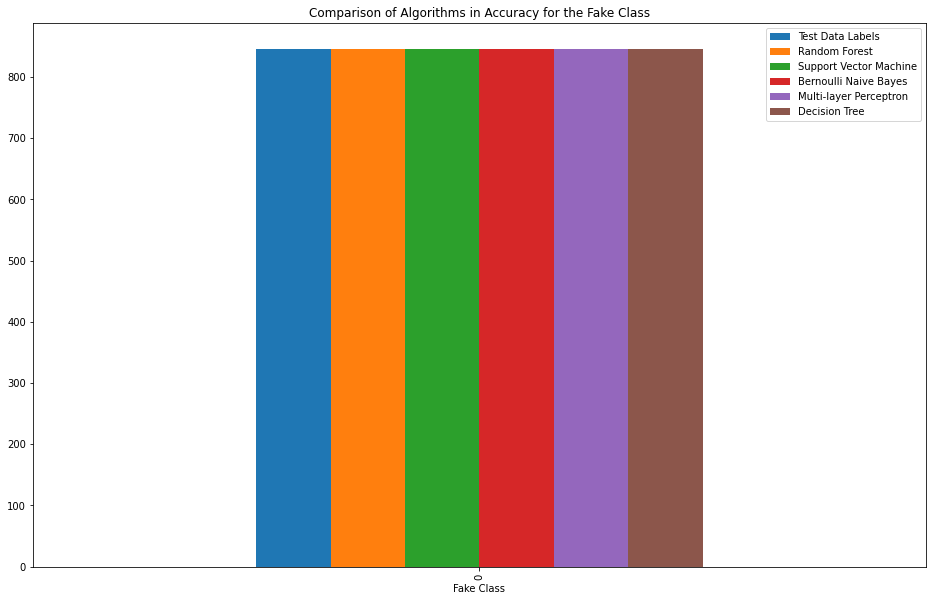

In [21]:
fgraph.plot(x='Fake Class', kind='bar', stacked=False, title='Comparison of Algorithms in Accuracy for the Fake Class')

In [22]:
lgraph = pd.DataFrame([[1, len(y_test == 1), len(rfc_pred == 1), len(svm_pred == 1), len(bnb_pred == 1), len(mlp_pred == 1), len(dt_pred == 1)]],
                    columns=['Legit Class', 'Test Data Labels', 'Random Forest', 'Support Vector Machine', 'Bernoulli Naive Bayes', 'Multi-layer Perceptron', 'Decision Tree'])

<AxesSubplot:title={'center':'Comparison of Algorithms in Accuracy for the Legit Class'}, xlabel='Legit Class'>

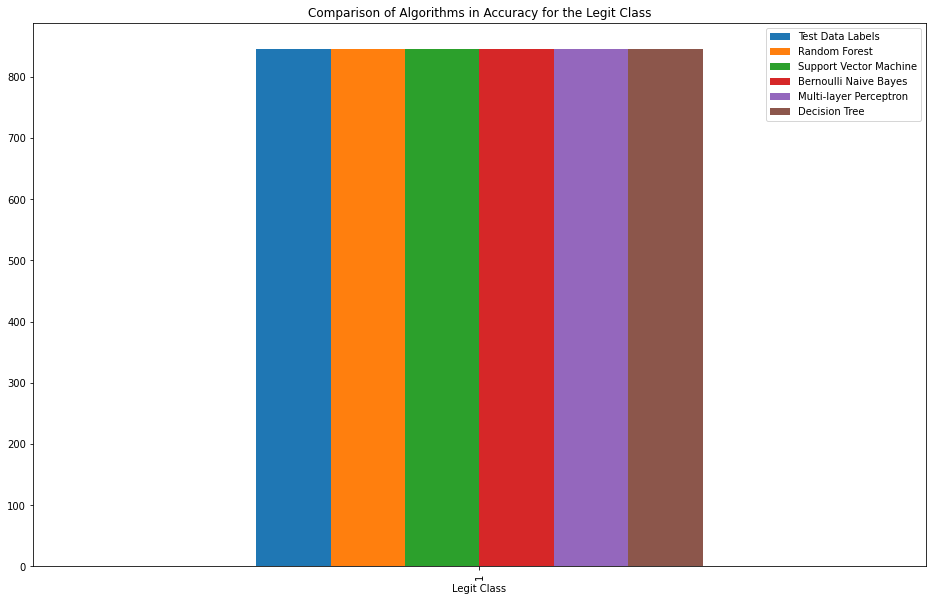

In [23]:
lgraph.plot(x='Legit Class', kind='bar', stacked=False, title='Comparison of Algorithms in Accuracy for the Legit Class')

In [24]:
rfc_cm = confusion_matrix(y_test, rfc_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
bnb_cm = confusion_matrix(y_test, bnb_pred)
mlp_cm = confusion_matrix(y_test, mlp_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

<AxesSubplot:title={'center':'Random Forest Classifier Confusion Matrix'}>

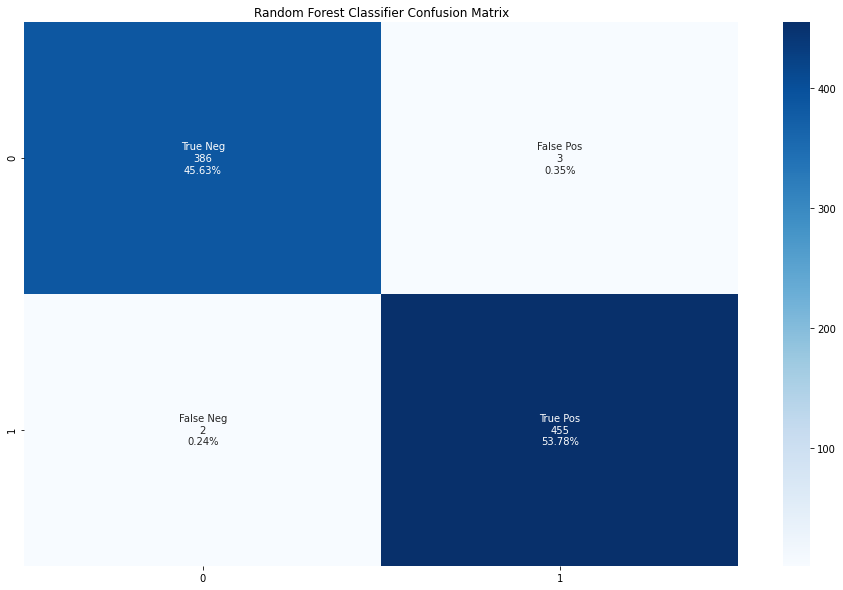

In [25]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in rfc_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in rfc_cm.flatten()/np.sum(rfc_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.title('Random Forest Classifier Confusion Matrix')
sns.heatmap(rfc_cm, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:title={'center':'Support Vector Classifier Confusion Matrix'}>

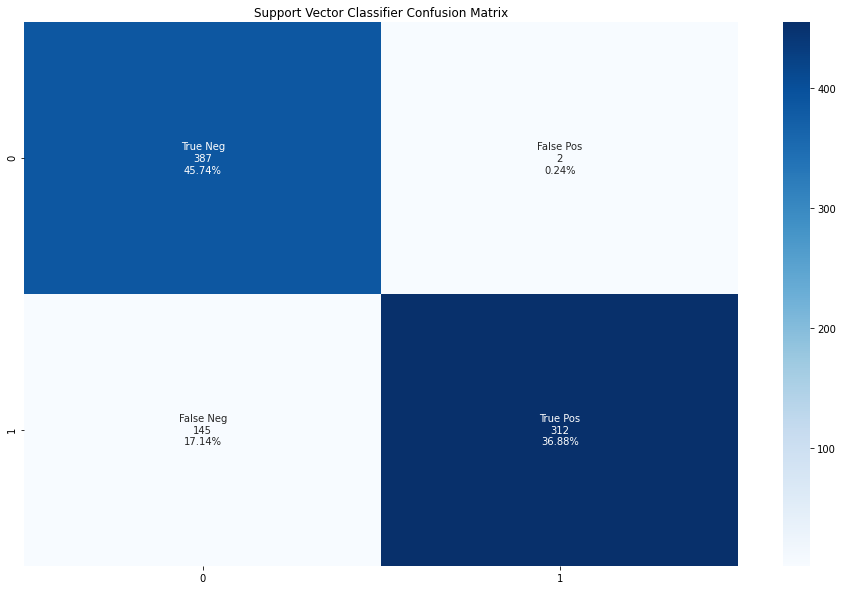

In [26]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in svm_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in svm_cm.flatten()/np.sum(svm_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.title('Support Vector Classifier Confusion Matrix')
sns.heatmap(rfc_cm, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:title={'center':'Bernoulli Naive Bayes Classifier Confusion Matrix'}>

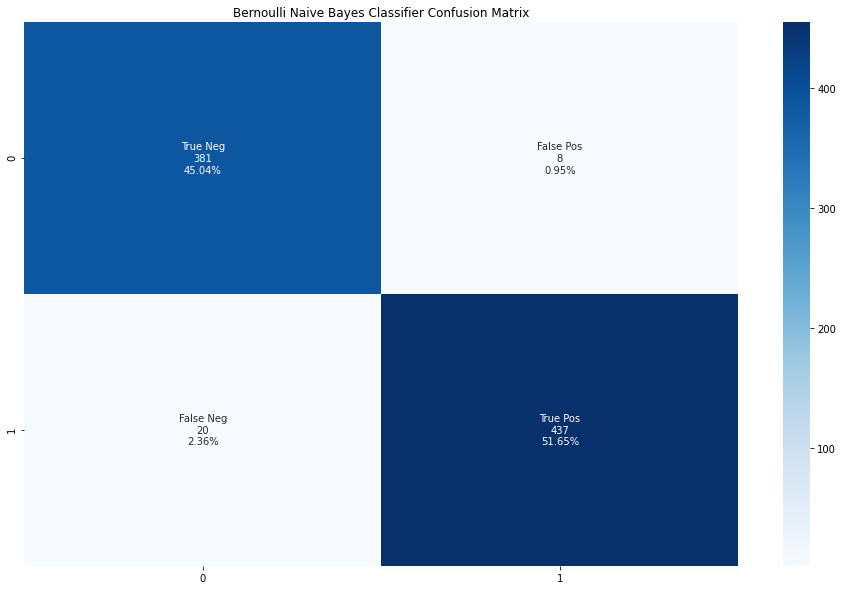

In [27]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in bnb_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in bnb_cm.flatten()/np.sum(bnb_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.title('Bernoulli Naive Bayes Classifier Confusion Matrix')
sns.heatmap(rfc_cm, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:title={'center':'Multi-layer Perceptron Confusion Matrix'}>

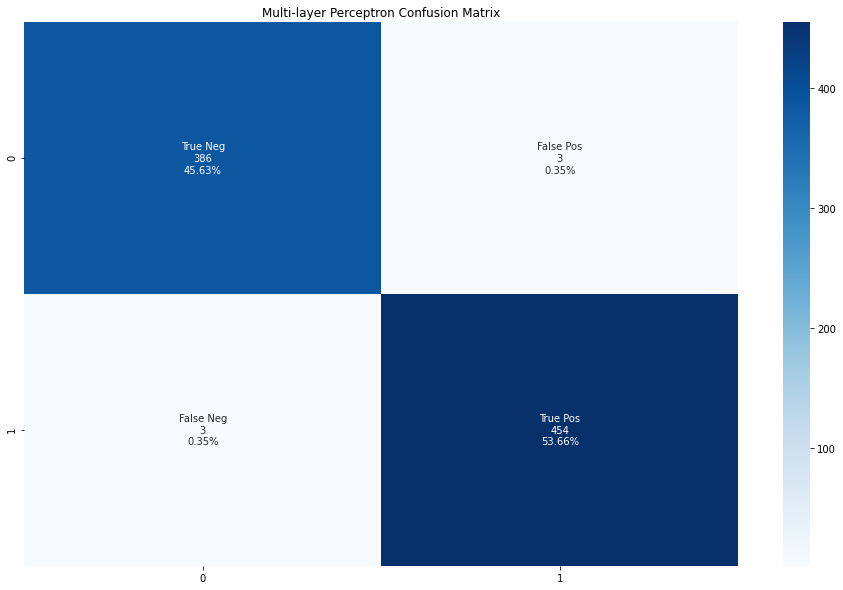

In [28]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in mlp_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in mlp_cm.flatten()/np.sum(mlp_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.title('Multi-layer Perceptron Confusion Matrix')
sns.heatmap(rfc_cm, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:title={'center':'Decision Tree Classifier Confusion Matrix'}>

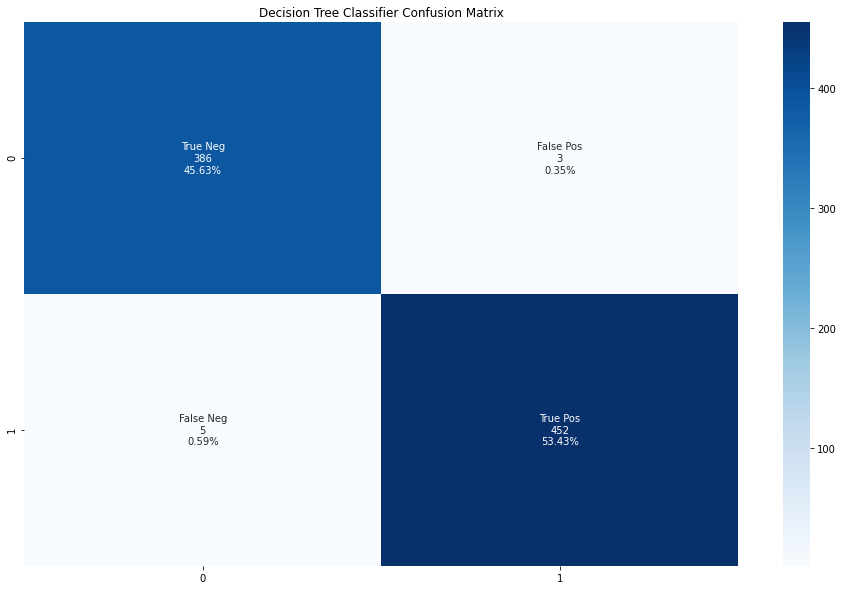

In [29]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in dt_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in dt_cm.flatten()/np.sum(dt_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.title('Decision Tree Classifier Confusion Matrix')
sns.heatmap(rfc_cm, annot=labels, fmt='', cmap='Blues')

In [30]:
print("Random Forest Classifier Accuracy: ", accuracy_score(y_test, rfc_pred))
print("Support Vector Classifier Accuracy: ", accuracy_score(y_test, svm_pred))
print("Bernoulli Naive Bayes Classifier Accuracy: ", accuracy_score(y_test, bnb_pred))
print("Multi-layer Perceptron Accuracy: ", accuracy_score(y_test, mlp_pred))
print("Decision Tree Classifier Accuracy: ", accuracy_score(y_test, dt_pred))

Random Forest Classifier Accuracy:  0.9940898345153665
Support Vector Classifier Accuracy:  0.8262411347517731
Bernoulli Naive Bayes Classifier Accuracy:  0.966903073286052
Multi-layer Perceptron Accuracy:  0.9929078014184397
Decision Tree Classifier Accuracy:  0.9905437352245863


<BarContainer object of 1 artists>

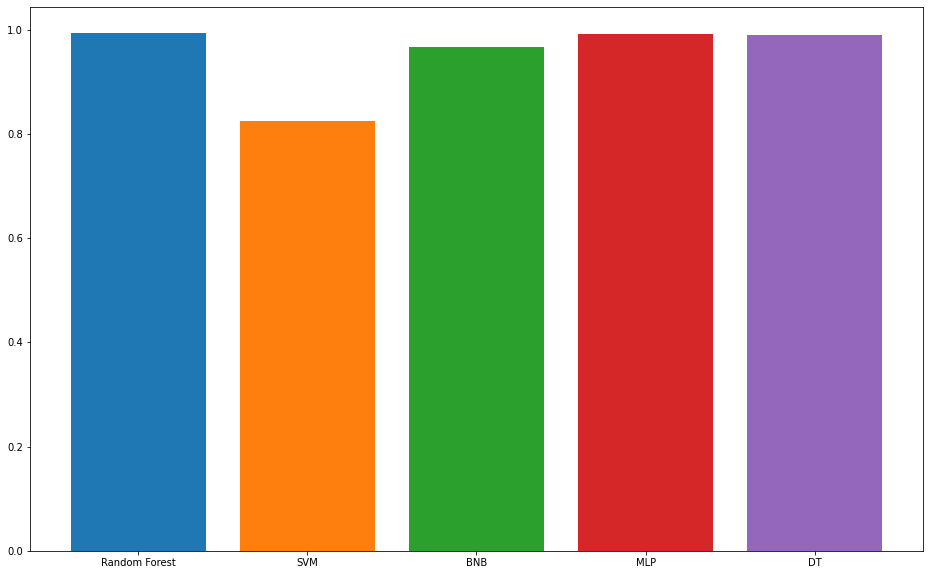

In [31]:
plt.bar('Random Forest', accuracy_score(y_test, rfc_pred))
plt.bar('SVM', accuracy_score(y_test, svm_pred))
plt.bar('BNB', accuracy_score(y_test, bnb_pred))
plt.bar('MLP', accuracy_score(y_test, mlp_pred))
plt.bar('DT', accuracy_score(y_test, dt_pred))

In [32]:
print("Random Forest Classifier F1-score: ", f1_score(y_test, rfc_pred))
print("Support Vector Classifier F1-score: ", f1_score(y_test, svm_pred))
print("Bernoulli Naive Bayes Classifier F1-score: ", f1_score(y_test, bnb_pred))
print("Multi-layer Perceptron F1-score: ", f1_score(y_test, mlp_pred))
print("Decision Tree Classifier F1-score: ", f1_score(y_test, dt_pred))

Random Forest Classifier F1-score:  0.994535519125683
Support Vector Classifier F1-score:  0.8093385214007782
Bernoulli Naive Bayes Classifier F1-score:  0.9689578713968958
Multi-layer Perceptron F1-score:  0.9934354485776805
Decision Tree Classifier F1-score:  0.9912280701754386


<BarContainer object of 1 artists>

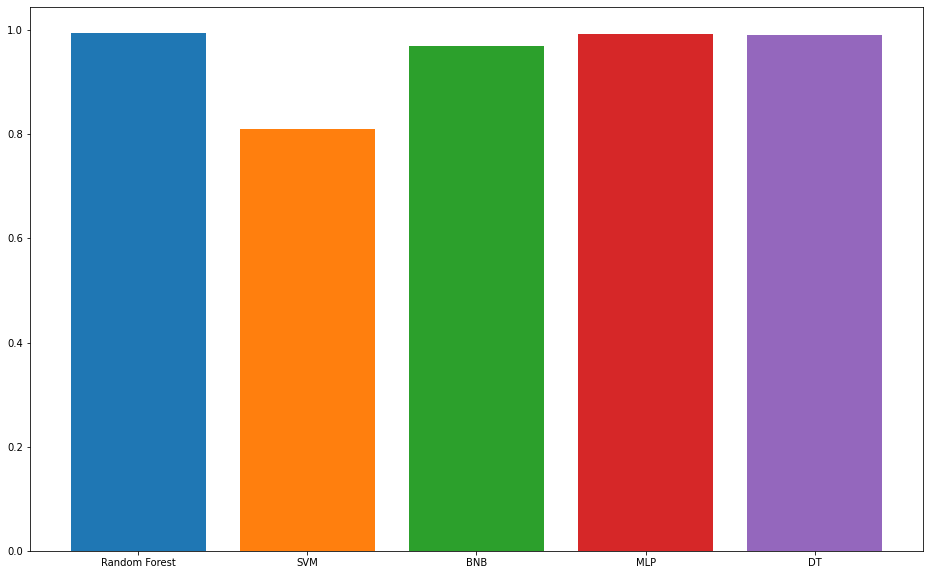

In [33]:
plt.bar('Random Forest', f1_score(y_test, rfc_pred))
plt.bar('SVM', f1_score(y_test, svm_pred))
plt.bar('BNB', f1_score(y_test, bnb_pred))
plt.bar('MLP', f1_score(y_test, mlp_pred))
plt.bar('DT', f1_score(y_test, dt_pred))